In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from time import perf_counter

In [81]:
email_df = pd.read_csv('spam_ham_dataset.csv')

In [82]:
email_df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [83]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [84]:
email_df.isnull().value_counts()

Unnamed: 0  label  text   label_num
False       False  False  False        5171
dtype: int64

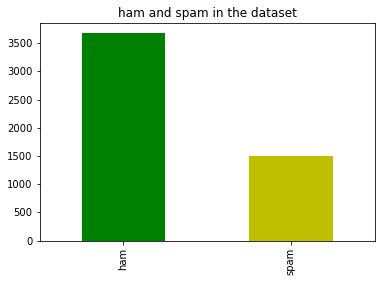

In [85]:
email_df['label'].value_counts().plot.bar(color=['g', 'y'])
plt.title('ham and spam in the dataset')
plt.show()

In [86]:
from nltk.tokenize import RegexpTokenizer

def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')):
    # Clean a string with RegexpTokenizer
    string = string.lower()
    tokens = reg.tokenize(string)
    return " ".join(tokens)

In [87]:
email_df['text_clean'] = email_df['text'].apply(lambda string: clean_str(string))
email_df.head()

,Unnamed: 0,label,text,label_num,text_clean
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter this is a follow ...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom for january see attached file ...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho we re around to ...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop windows office cheap main tr...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject re indian springs this deal is to book...


In [89]:
# Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(email_df.text_clean)
# Get the categories
y = email_df.label

In [91]:
X

<5171x45742 sparse matrix of type '<class 'numpy.int64'>'
	with 416985 stored elements in Compressed Sparse Row format>

In [92]:
y

0        ham
1        ham
2        ham
3       spam
4        ham
        ... 
5166     ham
5167     ham
5168     ham
5169     ham
5170    spam
Name: label, Length: 5171, dtype: object

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [97]:
# Comparing multiple models
models = {
    "Random Forest": {"model":RandomForestClassifier(), "Training Time":0},
    "Gradient Boosting": {"model":GradientBoostingClassifier(), "Training Time":0},
    "XGBoost": {"model":XGBClassifier(eval_metric='mlogloss'), "Training Time":0},
    "MultinomialNB": {"model":MultinomialNB(), "Training Time":0},
    "Logistic Regr.": {"model":LogisticRegression(), "Training Time":0},
    "KNN": {"model":KNeighborsClassifier(), "Training Time":0},
    "Decision Tree": {"model":DecisionTreeClassifier(), "Training Time":0},
    "SVM (Linear)": {"model":LinearSVC(), "Training Time":0},
    "SVM (RBF)": {"model":SVC(), "Training Time":0}
}

for name, model in models.items():
    start = perf_counter()
    model['model'].fit(X_train, y_train)
    duration = perf_counter() - start
    duration = round(duration,2)
    model["Training Time"] = duration
    print(f"{name:20} trained in {duration} sec")

Random Forest        trained in 7.87 sec
Gradient Boosting    trained in 39.06 sec


C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBoost              trained in 4.22 sec
MultinomialNB        trained in 0.03 sec


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regr.       trained in 1.05 sec
KNN                  trained in 0.01 sec
Decision Tree        trained in 1.27 sec


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


SVM (Linear)         trained in 0.26 sec
SVM (RBF)            trained in 5.12 sec


In [98]:
models_acc = []
for name, model in models.items():
    models_acc.append([name, model["model"].score(X_test, y_test),model["Training Time"]])

In [99]:
df_acc = pd.DataFrame(models_acc)
df_acc.columns = ['Model', 'Accuracy w/o scaling', 'Training time (sec)']
df_acc.sort_values(by = 'Accuracy w/o scaling', ascending = False, inplace=True)
df_acc.reset_index(drop = True, inplace=True)
df_acc

,Model,Accuracy w/o scaling,Training time (sec)
0,Logistic Regr.,0.980670,1.05
1,MultinomialNB,0.976160,0.03
2,SVM (Linear),0.971005,0.26
3,Random Forest,0.969072,7.87
4,XGBoost,0.968428,4.22
5,SVM (RBF),0.967139,5.12
6,Gradient Boosting,0.955541,39.06
7,Decision Tree,0.952320,1.27
8,KNN,0.857603,0.01


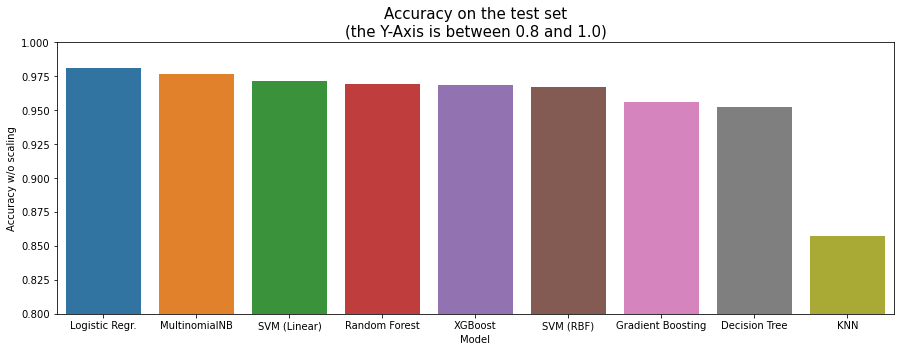

In [100]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Accuracy w/o scaling', data = df_acc)
plt.title('Accuracy on the test set\n(the Y-Axis is between 0.8 and 1.0)', fontsize = 15)
plt.ylim(0.8,1)
plt.show()

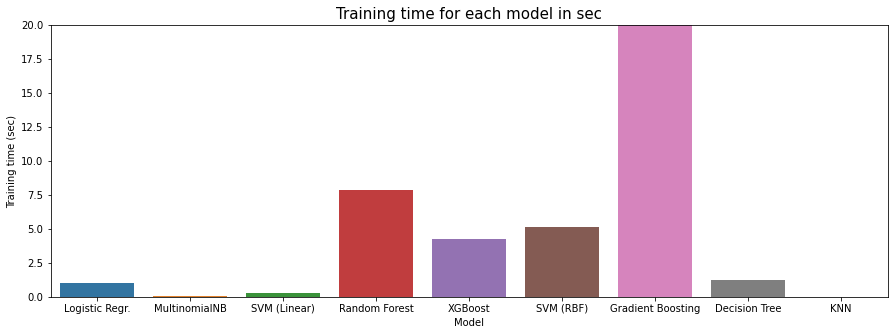

In [101]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Training time (sec)', data = df_acc)
plt.title('Training time for each model in sec', fontsize = 15)
plt.ylim(0,20)
plt.show()

XGBoosting gives the best result on the test set. Nevertheless, MultinomialNB is nearly as good, but is very fast (0.2 sec vs 5.1 sec). In the following part, we'll choose the MultinomialNB and try various hyperparameters to optimize it.

# Hyper parameter selection

In [102]:
# Find the best hyperparameter with GridSearchCV
# Exhaustive search over specified parameter values for an estimator.
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
parameters = {"alpha": [0.2,1,2,5,10], "fit_prior": [True, False]}

grid = GridSearchCV(MultinomialNB(), param_grid=parameters)
grid.fit(X_train,y_train)

# Create a DataFrame with the best Hyperparameters
pd.DataFrame(grid.cv_results_)[['params','mean_test_score']]\
                               .sort_values(by="mean_test_score", ascending=False)


,params,mean_test_score
3,"{'alpha': 1, 'fit_prior': False}",0.979001
1,"{'alpha': 0.2, 'fit_prior': False}",0.978726
0,"{'alpha': 0.2, 'fit_prior': True}",0.978174
2,"{'alpha': 1, 'fit_prior': True}",0.977620
5,"{'alpha': 2, 'fit_prior': False}",0.972092
4,"{'alpha': 2, 'fit_prior': True}",0.966843
7,"{'alpha': 5, 'fit_prior': False}",0.931196
6,"{'alpha': 5, 'fit_prior': True}",0.920695
9,"{'alpha': 10, 'fit_prior': False}",0.877868
8,"{'alpha': 10, 'fit_prior': True}",0.872342


In [103]:
grid.best_params_

{'alpha': 1, 'fit_prior': False}

In [104]:
# Create the model with the best hyperparameters
from sklearn.naive_bayes import MultinomialNB
alpha, fit_prior = grid.best_params_['alpha'], grid.best_params_['fit_prior']
model = MultinomialNB(alpha = alpha)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print('Accuracy: {0}'.format(round(accuracy_score(y_test,y_pred),3)*100))

Accuracy: 97.6


In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.98      1121
        spam       0.96      0.95      0.96       431

    accuracy                           0.98      1552
   macro avg       0.97      0.97      0.97      1552
weighted avg       0.98      0.98      0.98      1552

